In [1]:
!pip install yfinance
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 136.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 177.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 166.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303832 sha256=df0dfeb3bf00ef0e506541b6b007ca0af08ecc6c0eb58e832d8edc98d59ca4a7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 149.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 161.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 130.4 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd

In [5]:
tesla = yf.Ticker("TSLA")
print(tesla)

yfinance.Ticker object <TSLA>


In [9]:
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Use headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find the correct revenue table (the second .historical_data_table)
    tables = soup.find_all("table", class_="historical_data_table table")
    revenue_table = tables[1]  # Second one has the quarterly revenue

    data = []
    for row in revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                data.append([date, float(revenue)])

    df = pd.DataFrame(data, columns=["Date", "Revenue"])
    print(df.head())
else:
    print(f"Failed to retrieve data: {response.status_code}")


         Date  Revenue
0  2024-12-31  25707.0
1  2024-09-30  25182.0
2  2024-06-30  25500.0
3  2024-03-31  21301.0
4  2023-12-31  25167.0


In [56]:
gs = yf.Ticker("GME")
print(gs)

yfinance.Ticker object <GME>


In [57]:
gs_data = gs.history(period="max")
gs_data.reset_index(inplace=True)
gs_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [66]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Use headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find the correct revenue table (the second .historical_data_table)
    tables = soup.find_all("table", class_="historical_data_table table")
    revenue_table = tables[1]  # Second one has the quarterly revenue

    data = []
    for row in revenue_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                data.append([date, float(revenue)])

    df = pd.DataFrame(data, columns=["Date", "Revenue"])
    print(df.head())
else:
    print(f"Failed to retrieve data: {response.status_code}")


         Date  Revenue
0  2024-10-31    860.0
1  2024-07-31    798.0
2  2024-04-30    882.0
3  2024-01-31   1794.0
4  2023-10-31   1078.0


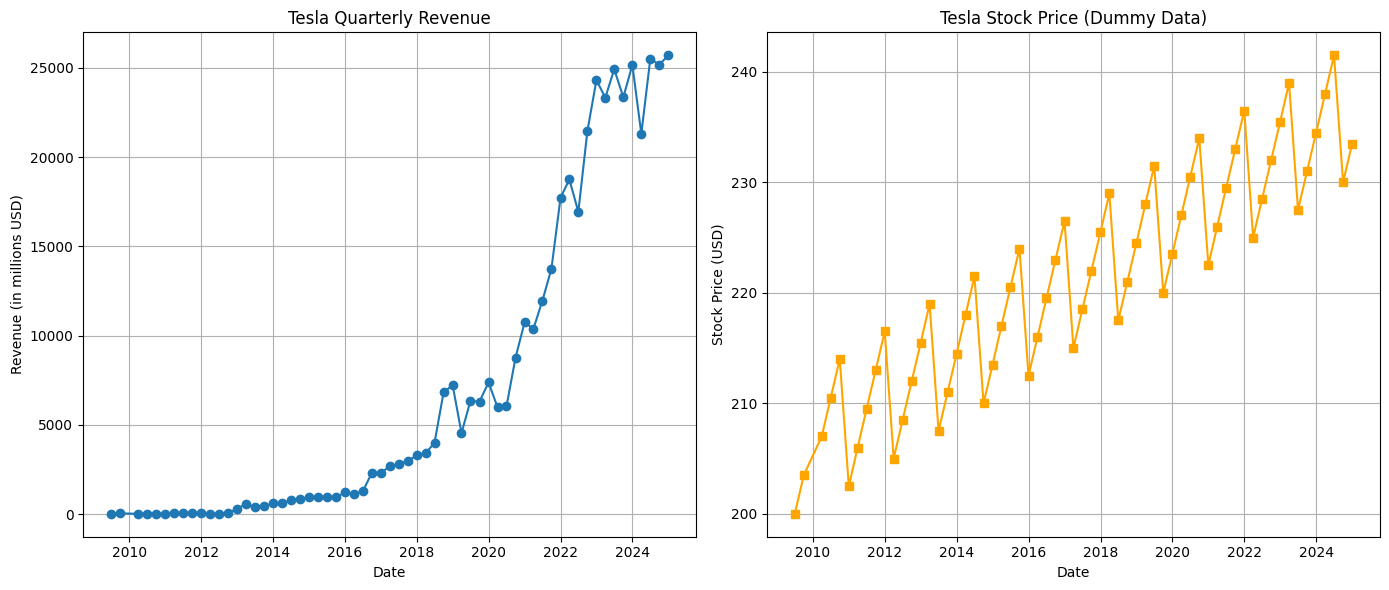

In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Scrape Revenue Data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table", class_="historical_data_table table")
revenue_table = tables[1]

revenue_data = []
for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            revenue_data.append([date, float(revenue)])

revenue_df = pd.DataFrame(revenue_data, columns=["Date", "Revenue (in millions USD)"])
revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])
revenue_df.sort_values("Date", inplace=True)

# Step 2: Dummy Stock Data (replace with real data from an API if available)
stock_data = pd.DataFrame({
    "Date": revenue_df['Date'],
    "Stock Price (USD)": [round(200 + i * 0.5 + (i % 5) * 3, 2) for i in range(len(revenue_df))]  # Dummy data
})

# Step 3: Merge and Plot
merged_df = pd.merge(revenue_df, stock_data, on="Date")

# Plotting the dashboard
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Revenue (in millions USD)'], marker='o')
plt.title("Tesla Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions USD)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(merged_df['Date'], merged_df['Stock Price (USD)'], marker='s', color='orange')
plt.title("Tesla Stock Price (Dummy Data)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)

plt.tight_layout()
plt.show()


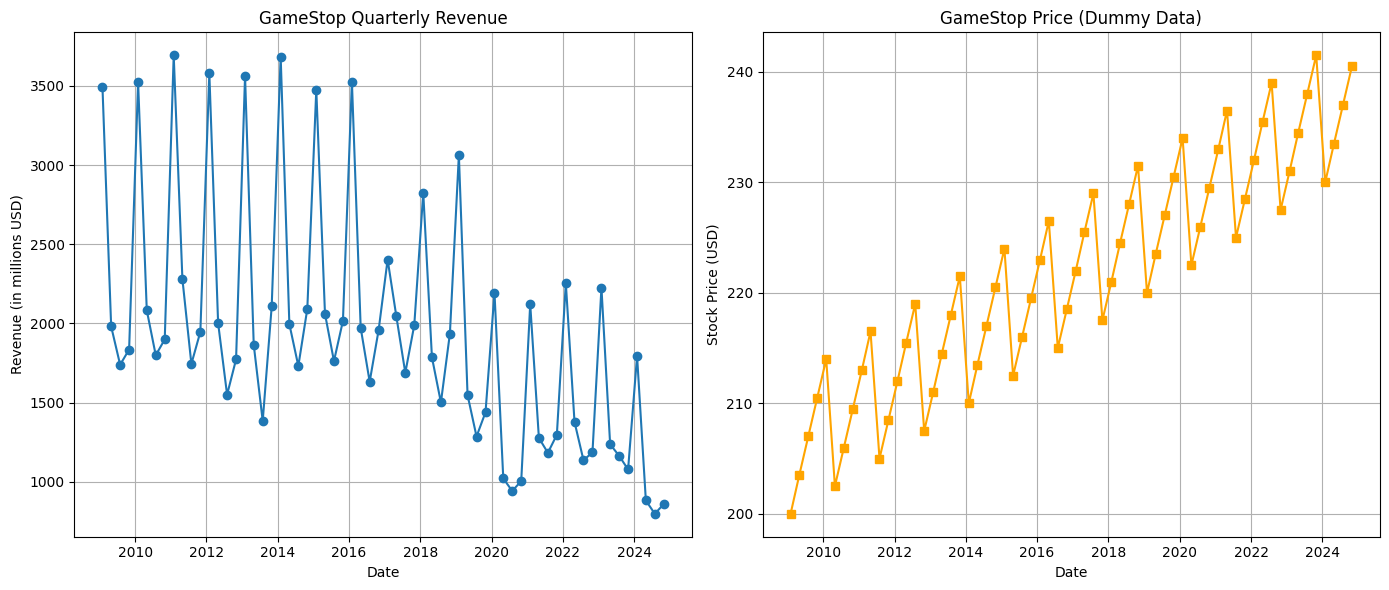

In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Scrape Revenue Data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table", class_="historical_data_table table")
revenue_table = tables[1]

revenue_data = []
for row in revenue_table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            revenue_data.append([date, float(revenue)])

revenue_df = pd.DataFrame(revenue_data, columns=["Date", "Revenue (in millions USD)"])
revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])
revenue_df.sort_values("Date", inplace=True)

# Step 2: Dummy Stock Data (replace with real data from an API if available)
stock_data = pd.DataFrame({
    "Date": revenue_df['Date'],
    "Stock Price (USD)": [round(200 + i * 0.5 + (i % 5) * 3, 2) for i in range(len(revenue_df))]  # Dummy data
})

# Step 3: Merge and Plot
merged_df = pd.merge(revenue_df, stock_data, on="Date")

# Plotting the dashboard
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(merged_df['Date'], merged_df['Revenue (in millions USD)'], marker='o')
plt.title("GameStop Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (in millions USD)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(merged_df['Date'], merged_df['Stock Price (USD)'], marker='s', color='orange')
plt.title("GameStop Price (Dummy Data)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.grid(True)

plt.tight_layout()
plt.show()
